# Validation

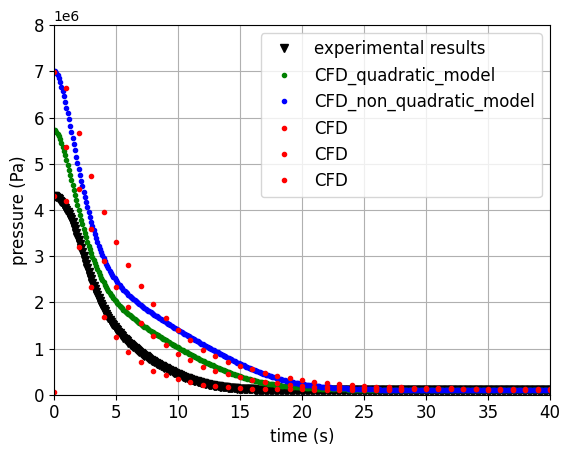

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


expdata600 = pd.read_csv('experimental_data_600.csv')
expdata800 = pd.read_csv('experimental_data_800.csv') 
expdata1000 = pd.read_csv('experimental_data_1000.csv') 

data600 = pd.read_csv('model_pellets_600.csv')
data800 = pd.read_csv('model_pellets_800.csv')
data1000 = pd.read_csv('model_pellets_1000.csv')

plt.plot(data600['time'], data600['inlet-p'], 'v', color='k', label = 'experimental results')
plt.plot(data800['time'], data800['inlet-p'], '.', color='g', label = 'CFD_quadratic_model')
plt.plot(data1000['time'], data1000['inlet-p'], '.', color='b', label = 'CFD_non_quadratic_model')
plt.plot(expdata600['time'], expdata600['inlet-p'], '.', color='r', label = 'CFD')
plt.plot(expdata800['time'], expdata800['inlet-p'], '.', color='r', label = 'CFD')
plt.plot(expdata1000['time'], expdata1000['inlet-p'], '.', color='r', label = 'CFD')

plt.xlabel('time (s)', fontsize = 12)
plt.xlim(0,40)
plt.ylim(0, 8000000)
plt.ylabel('pressure (Pa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()




# Verification

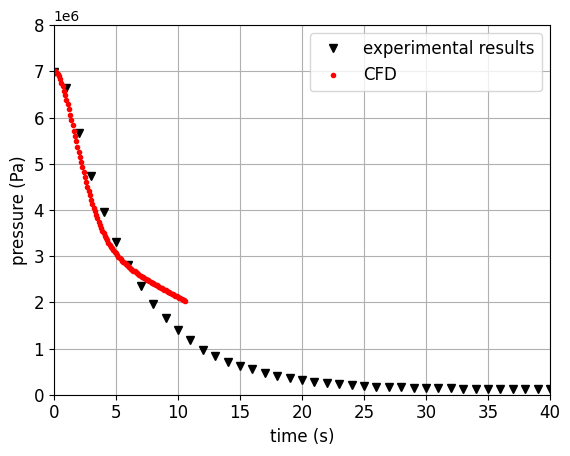

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create an empty dictionary to store the DataFrame


data_frames = {}
data20 = pd.read_csv('experimental_data.csv')
# data0 = pd.read_csv('model_pellets_quadratic.csv')
# data1 = pd.read_csv('model_pellets_no_quadratic.csv')
data2 = pd.read_csv('model_pellets_same.csv')


# # Loop through numbers
# for i in range(0, 20):
#     filename = f'stocastich_tools_out_runner{i:02d}_no_quadratic.csv'
#     data_frames[f'data{i}'] = pd.read_csv(filename)


# color_palette = plt.cm.get_cmap('tab20', len(data_frames))

# # Function to compute Absolute Root Mean Square Error (ARMSE)
# def compute_armse(y_values, experimental_y_values):
#     absolute_error = np.abs(y_values - experimental_y_values)
#     squared_error = absolute_error**2
#     mean_squared_error = np.mean(squared_error)
#     armse = np.sqrt(mean_squared_error)
#     return armse

# plt.plot(data1['time'], data1['inlet-p'], '.', color='b', label = 'CFD_no_quadratic_model')

# # Plot the data for each DataFrame with different line colors
# for idx, (key, df) in enumerate(data_frames.items()):
#     plt.plot(df['time'], df['inlet-p'], color=color_palette(idx), label=f'Data for {key}', linestyle='-')
#     # Compute the error between the plot and experimental data
#     x_values = df['time']
#     y_values = df['inlet-p']
#     experimental_y_values = np.interp(x_values, data20['time'], data20['inlet-p'])
#     range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
#     narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
#     print(f"NARMSE for {key}: {narmse:.2e}")
    

plt.plot(data20['time'], data20['inlet-p'], 'v', color='k', label = 'experimental results')
# plt.plot(data0['time'], data0['inlet-p'], '.', color='g', label = 'CFD_quadratic_model')
# plt.plot(data1['time'], data1['inlet-p'], '.', color='b', label = 'CFD_non_quadratic_model')
plt.plot(data2['time'], data2['inlet-p'], '.', color='r', label = 'CFD')
plt.xlabel('time (s)', fontsize = 12)
plt.xlim(0,40)
plt.ylim(0, 8000000)
plt.ylabel('pressure (Pa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()


KeyError: 'inlet-p'

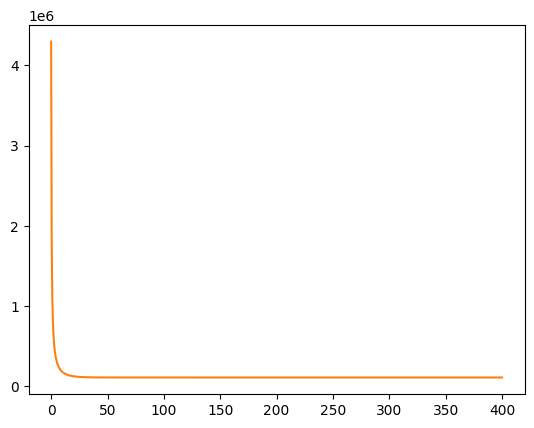

In [33]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

def P(t):
    P1 = 101325
    P2 = 4300000
    viscosity = 0.0000181
    volume = 6.43333E-06
    stack_length = 0.03176
    permeability = 9.09582E-14
    Pp = 0.953957047
    A = 5.33267e-05
    pressure = P1*(1+Pp*math.e**(-(P1*permeability*A)/(viscosity*volume*stack_length)*t))/(1-Pp*math.e**(-(P1*permeability*A)/(viscosity*volume*stack_length)*t))
    return pressure

t = np.linspace(0, 400, 800)
y = P(t)

CFD = pd.read_csv('model_pellets_out.csv')

plt.plot(t, y, color='C1', label ='analytical solution')
plt.plot(CFD['time'], CFD['inlet-p'], color='C2', label = 'CFD result')
# plt.plot(CFD_unviscid['time'], CFD_unviscid['inlet-p'], color='C3', label = 'unviscid')
plt.grid(which = 'major', axis = 'both', linestyle = '--')
plt.xlabel("time (s)", fontsize = 12)
plt.xlim(0,30)
plt.ylabel("pressure (Pa)", fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12) 